Мышковец С.А., v.01 08.11.2022

Решение задачи: В тексте (не менее 20000 символов) уменьшить размерность, используя метод главных компонент, при этом обеспечить сохранение информации не менее 80%.


Задачи:


- осуществить загрузку текста, токенизацию

- почистить данные (числа, знаки препинания, символы, стоп-слова)

- осуществить лемматизацию

- перевести в векторное представление

- применить метод главных компонент таким образом, чтобы потеря информации составила не более 20%

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- (если есть метки классов) посчитать результаты обучения. 
- попробуйте построить карту 2D c 10-40 словами что бы посмотреть расположены ли похожие слова рядом или нет.


Вывод: Чтобы сохранить не менее 80% иформации требуется не менее 2300 компонент.
    

# Загрузка данных

Открываем файл.

In [2]:
with open('Tayinaya istoriya.txt', "r", encoding="utf-8") as file:
    text = file.read()

# Предварительная обрабатка текста (препроцессинг)

Определяем длину текста.

In [3]:
len(text)

88007

Приводим символы в единый регистр (нижний).

In [4]:
text = text.lower()

Очищаем текст от знаков пунктуации, лишних пробельных символов и цифр:

- выводим все знаки пунктуации.

In [5]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


- добавляем к знакам пунктуации символы переноса строки, табуляции и другие символы.

In [6]:
spec_chars = string.punctuation + '\n\xa0«»\t—…' 

- удаляем символы:
  - используем поэлементную обработку строки: разделяем исходную строку text на символы,
  - оставляем только символы, не входящие в набор spec_chars
  - объединяем список символов в строку

In [7]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [8]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

# Токенизизация и лемматизация текста

Разбиваем очищенный текст на составные части – токены. Для задачи частотного анализа необходимо разбить текст на слова. Для этого используем готовый метод библиотеки nltk.

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\myshk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [11]:
text_tokens[:15]

['в',
 'горах',
 'начал',
 'таять',
 'снег',
 'а',
 'банни',
 'не',
 'было',
 'в',
 'живых',
 'уже',
 'несколько',
 'недель',
 'когда']

Вычисляем количество слов в предобработанном тексте.

In [12]:
len(text_tokens)

12900

Лемматизируем полученный список слов.

In [13]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
text_tokens_normal_form = []

In [14]:
for word in text_tokens:
    p = morph.parse(word)[0]
    text_tokens_normal_form.append(p.normal_form)

In [15]:
text_tokens_normal_form[:5]

['в', 'гора', 'начать', 'таять', 'снег']

Преобразовываем список токенов к классу Text библиотеки nltk для применения инструментов частотного анализа.

In [16]:
text = nltk.Text(text_tokens_normal_form)

# Статистика встречаемости слов в тексте

Для подсчёта статистики распределения частот слов в тексте применяется класс FreqDist (frequency distributions).

In [17]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

Выводим переменную fdist (словарь, содержащий токены и их частоты – количество раз, которые эти слова встречаются в тексте).

In [18]:
fdist

FreqDist({'я': 430, 'и': 418, 'в': 365, 'он': 262, 'не': 222, 'на': 220, 'что': 212, 'быть': 176, 'с': 154, '–': 130, ...})

Можно воспользоваться методом most_common для получения списка кортежей с наиболее часто встречающимися токенами

In [19]:
fdist.most_common(10)

[('я', 430),
 ('и', 418),
 ('в', 365),
 ('он', 262),
 ('не', 222),
 ('на', 220),
 ('что', 212),
 ('быть', 176),
 ('с', 154),
 ('–', 130)]

# Удаление стоп-слов

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myshk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Получаем список стоп-слов для русского языка

In [21]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

По необходимости расширяем список стоп-слов.

In [22]:
russian_stopwords.extend(['это', 'нею', '–', '“', '”', 'весь', 'который', 'изз', 'лишь', 'ещё', 'поскольку', 'свой', 'наш', 'ваш'])

Получаем список слов, не входящих в список стоп-слов.

In [23]:
tokens = [x for x in text_tokens_normal_form if x not in russian_stopwords]

In [24]:
type(tokens)

list

In [25]:
tokens[:10]

['гора',
 'начать',
 'таять',
 'снег',
 'банни',
 'живой',
 'несколько',
 'неделя',
 'осознать',
 'тяжесть']

Получаем словарь слов, не входящих в список стоп-слов.

In [24]:
def no_stop_words(dct):
    clean_dct = {}
    for key, value in dct.items():
        if key not in russian_stopwords:
            clean_dct[key] = value
    return clean_dct
fdist_sw = no_stop_words(fdist)

Приводим словарь к типу FreqDist.

In [25]:
fdist_sw = FreqDist(fdist_sw)

In [26]:
fdist_sw

FreqDist({'мочь': 55, 'сказать': 34, 'человек': 33, 'год': 28, 'банни': 25, 'генри': 22, 'просто': 22, 'время': 22, 'лицо': 22, 'ничто': 22, ...})

Выводим 10 самых часто встречающихся слов в тексте.

In [27]:
fdist_sw.most_common(10)

[('мочь', 55),
 ('сказать', 34),
 ('человек', 33),
 ('год', 28),
 ('банни', 25),
 ('генри', 22),
 ('просто', 22),
 ('время', 22),
 ('лицо', 22),
 ('ничто', 22)]

Строим график частоты встречаемости слов.

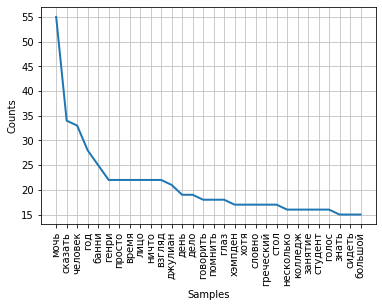

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
fdist_sw.plot(30,cumulative=False)

Преобразовываем FreqDist к DataFrame.

In [29]:
import pandas as pd

In [30]:
df = dict(fdist_sw)

In [31]:
colNames = ['freq']
df = pd.DataFrame.from_dict(df, orient='index', columns=colNames)

In [32]:
df.sort_values('freq', ascending=False).head(20)

,freq
мочь,55
сказать,34
человек,33
год,28
банни,25
генри,22
просто,22
ничто,22
лицо,22
взгляд,22


# Перевод в векторное представление

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(tokens)
vectorizer.get_feature_names_out()
X.shape

(7583, 3883)

In [34]:
# first_vector_tfidfvectorizer=vectorizer.fit_transform(tokens)[0]
# df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"]) 
# df.sort_values(by=["tfidf"],ascending=False)


In [35]:
df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out()).T
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3883 entries, anecdota to ящикпоследующий
Columns: 7583 entries, 0 to 7582
dtypes: float64(7583)
memory usage: 224.7+ MB


In [36]:
df.shape

(3883, 7583)

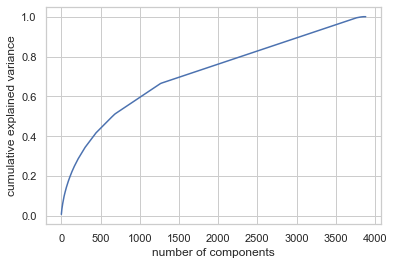

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.007301,0.007301
1,0.011966,0.004665
2,0.016324,0.004358
3,0.020255,0.003931
4,0.023952,0.003697
5,0.027616,0.003663
6,0.031097,0.003482
7,0.034072,0.002974
8,0.037045,0.002973
9,0.039950,0.002906


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=3883)
pca_test.fit(df)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

Выбор количества компонентов

# Применяем метод главных компонент таким образом, чтобы потеря информации составила не более 20%

In [ ]:
pca = PCA(2300).fit(df)